In [1]:
import numpy as np
import pandas as pd

from statsmodels.stats import multitest
from scipy import stats

import SUITPy.flatmap as flatmap


import selective_recruitment.data as sdata
import selective_recruitment.globals as gl
import selective_recruitment.region as sreg
import selective_recruitment.plotting as plotting

import Functional_Fusion.dataset as ds
import Functional_Fusion.atlas_map as am

import warnings
warnings.filterwarnings('ignore')

# statistically investigate conjunctions between the contrasts of interest at the voxel level


In [2]:
# setting some defaults
dataset = "WMFS"
ses_id = "ses-02"
atlas_suit = "SUIT3"
atlas_fs = "fs32k"
parcellation = "NettekovenSym68c32"
smooth = 3
# create an atlas object
atlas_cereb, asinfo = am.get_atlas(atlas_dir=gl.atlas_dir, atlas_str=atlas_suit)
atlas_cortex, afinfo = am.get_atlas(atlas_dir=gl.atlas_dir, atlas_str=atlas_fs)

In [3]:
# get cerebellar data
data_cereb,info,dset = ds.get_dataset(gl.base_dir,
                                        dataset = dataset,
                                        atlas=atlas_suit,
                                        sess=ses_id,
                                        subj=None,
                                        type = "CondAll",  
                                        smooth = smooth)

# get cortical data
data_cortex,info,dset = ds.get_dataset(gl.base_dir,
                                        dataset = dataset,
                                        atlas=atlas_fs,
                                        sess=ses_id,
                                        subj=None,
                                        type = "CondAll",  
                                        smooth = smooth)

In [4]:
# get contrast of interest (define all your contrasts here)
c_enc = np.zeros(len(info.index))
c_enc[info.phase == 0] = 1/(sum(info.phase == 0))

c_ret = np.zeros(len(info.index))
c_ret[info.phase == 1] = 1/(sum(info.phase == 1))

c_load = np.zeros(len(info.index))
c_load[info.load == 6] = 1/(sum(info.load == 6))
c_load[info.load == 2] = -1/(sum(info.load == 2))

c_recall = np.zeros(len(info.index))
c_recall[info.recall == 0] = 1/(sum(info.recall == 0))
c_recall[info.recall == 1] = -1/(sum(info.recall == 1))

c_loadB = np.zeros(len(info.index))
c_loadB[(info.load == 6) & (info.recall == 0)] = 1/ sum((info.load == 6) & (info.recall == 0))
c_loadB[(info.load == 2) & (info.recall == 0)] = -1/ sum((info.load == 2) & (info.recall == 0))


c_loadF = np.zeros(len(info.index))
c_loadF[(info.load == 6) & (info.recall == 1)] = 1/ sum((info.load == 6) & (info.recall == 1))
c_loadF[(info.load == 2) & (info.recall == 1)] = -1/ sum((info.load == 2) & (info.recall == 1))

c_dir6 = np.zeros(len(info.index))
c_dir6[(info.load == 6) & (info.recall == 0)] = 1/ sum((info.load == 6) & (info.recall == 0))
c_dir6[(info.load == 6) & (info.recall == 1)] = 1/ sum((info.load == 6) & (info.recall == 1))

c_dir4 = np.zeros(len(info.index))
c_dir4[(info.load == 4) & (info.recall == 0)] = 1/ sum((info.load == 4) & (info.recall == 0))
c_dir4[(info.load == 4) & (info.recall == 1)] = 1/ sum((info.load == 4) & (info.recall == 1))

c_dir2 = np.zeros(len(info.index))
c_dir2[(info.load == 2) & (info.recall == 0)] = 1/ sum((info.load == 2) & (info.recall == 0))
c_dir2[(info.load == 2) & (info.recall == 1)] = 1/ sum((info.load == 2) & (info.recall == 1))

c_loadFenc = np.zeros(len(info.index))
c_loadFenc[(info.load == 6) & (info.recall == 1) & (info.phase == 0)] = 1/ sum((info.load == 6) & (info.recall == 1) & (info.phase == 0))
c_loadFenc[(info.load == 2) & (info.recall == 1) & (info.phase == 0)] = -1/ sum((info.load == 2) & (info.recall == 1) & (info.phase == 0))


c_loadFret = np.zeros(len(info.index))
c_loadFret[(info.load == 6) & (info.recall == 1) & (info.phase == 1)] = 1/ sum(((info.load == 6) & (info.recall == 1) & (info.phase == 1)))
c_loadFret[(info.load == 2) & (info.recall == 1) & (info.phase == 1)] = -1/ sum(((info.load == 2) & (info.recall == 1) & (info.phase == 1)))

c_dirEnc = np.zeros(len(info.index))
c_dirEnc[(info.recall == 0) & (info.phase == 0)] = 1/(sum((info.recall == 0) & (info.phase == 0)))
c_dirEnc[(info.recall == 1) & (info.phase == 0)] = -1/(sum((info.recall == 1) & (info.phase == 0)))


c_dirRet = np.zeros(len(info.index))
c_dirRet[(info.recall == 0) & (info.phase == 1)] = 1/(sum((info.recall == 0) & (info.phase == 1)))
c_dirRet[(info.recall == 1) & (info.phase == 1)] = -1/(sum((info.recall == 1) & (info.phase == 1)))



## what are the regions that show both encoding and retrieval effect

### in the cerebellum

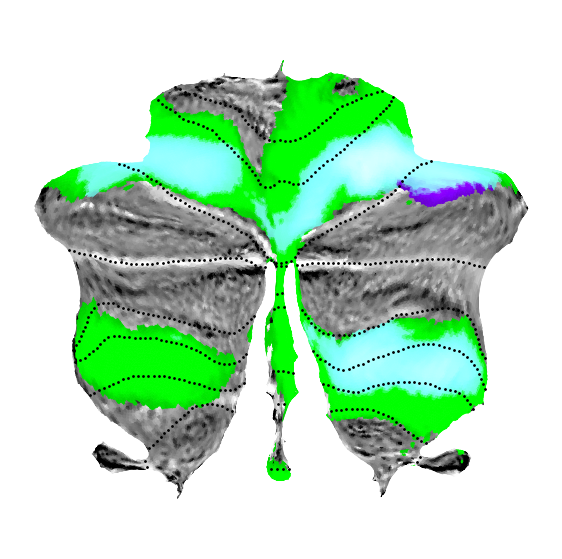

In [11]:
# get the contrast for encoding
data_enc = c_enc @ data_cereb
# do voxelwise one sample t-test 
t_enc, p_enc = stats.ttest_1samp(data_enc, 
                                          axis = 0, 
                                          popmean = 0, 
                                          nan_policy = 'omit', 
                                          alternative = 'greater')

# apply fdr (creates a mask for ps surviving correction)
enc_mask, _ = multitest.fdrcorrection(p_enc, 
                                            alpha=0.05, 
                                            method='indep', 
                                            is_sorted=False)
mean_enc = np.nanmean(data_enc, axis = 0)
# apply the mask and plot on the flatmap
enc_sig = mean_enc * enc_mask

# get the contrast for retrieval
data_ret = c_ret @ data_cereb
# do voxelwise one sample t-test 
t_ret, p_ret = stats.ttest_1samp(data_ret, 
                                          axis = 0, 
                                          popmean = 0, 
                                          nan_policy = 'omit', 
                                          alternative = 'greater')

# apply fdr (creates a mask for ps surviving correction)
ret_mask, _ = multitest.fdrcorrection(p_ret, 
                                            alpha=0.05, 
                                            method='indep', 
                                            is_sorted=False)
mean_ret = np.nanmean(data_ret, axis = 0)
# apply the mask and plot on the flatmap
ret_sig = mean_ret * ret_mask

# prepare for rgb map
dat_rgb0 =np.c_[enc_sig.reshape(-1, 1)/2,
                ret_sig.reshape(-1, 1),
                enc_sig.reshape(-1, 1),
                ].T # Leave the green gun empty 
# plot on flatmap
ax1 = plotting.plot_rgb_map(dat_rgb0, 
                            atlas_space = "SUIT3", 
                            scale = [0.1, 0.1, 0.1], 
                            threshold = [0.04, 0.08, 0.08])

### in the cortex

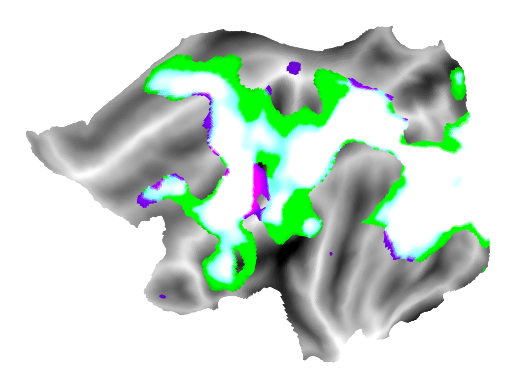

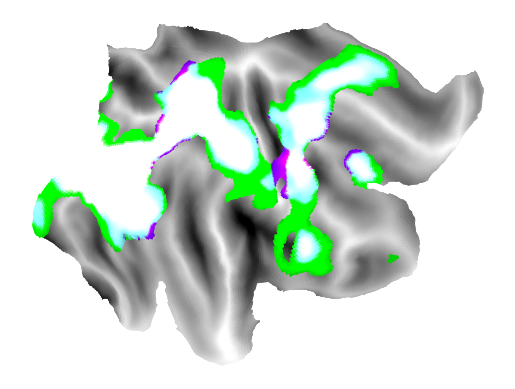

In [6]:
# get the contrast for load during encoding
data_enc = c_enc @ data_cortex
# do voxelwise one sample t-test 
t_enc, p_enc = stats.ttest_1samp(data_enc, 
                                          axis = 0, 
                                          popmean = 0, 
                                          nan_policy = 'omit', 
                                          alternative = 'greater')

# apply fdr (creates a mask for ps surviving correction)
enc_mask, _ = multitest.fdrcorrection(p_enc, 
                                            alpha=0.05, 
                                            method='indep', 
                                            is_sorted=False)
mean_enc = np.nanmean(data_enc, axis = 0)
# apply the mask and plot on the flatmap
enc_sig = mean_enc * enc_mask

# get the contrast for load during encoding
data_ret = c_ret @ data_cortex
# do voxelwise one sample t-test 
t_ret, p_ret = stats.ttest_1samp(data_ret, 
                                          axis = 0, 
                                          popmean = 0, 
                                          nan_policy = 'omit', 
                                          alternative = 'greater')

# apply fdr (creates a mask for ps surviving correction)
ret_mask, _ = multitest.fdrcorrection(p_ret, 
                                            alpha=0.05, 
                                            method='indep', 
                                            is_sorted=False)
mean_ret = np.nanmean(data_ret, axis = 0)
# apply the mask and plot on the flatmap
ret_sig = mean_ret * ret_mask

# prepare for rgb map
dat_rgb0 =np.c_[enc_sig.reshape(-1, 1)/2,
                ret_sig.reshape(-1, 1),
                enc_sig.reshape(-1, 1),
                ].T # Leave the green gun empty 
# plot on flatmap
ax1 = plotting.plot_rgb_map(dat_rgb0, 
                            atlas_space = "fs32k", 
                            scale = [0.1, 0.1, 0.1], 
                            threshold = [0.04, 0.08, 0.08])

### in the cerebellum

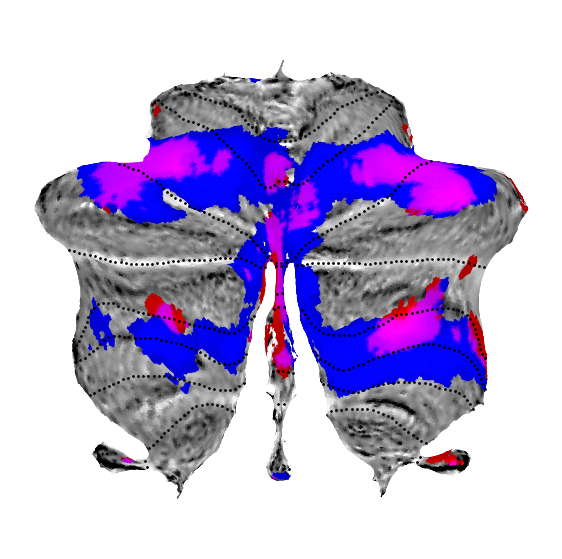

In [7]:
# get the contrast for load during encoding
data_loadEnc = c_loadFenc @ data_cereb
# do voxelwise one sample t-test 
t_loadEnc, p_loadEnc = stats.ttest_1samp(data_loadEnc, 
                                          axis = 0, 
                                          popmean = 0, 
                                          nan_policy = 'omit', 
                                          alternative = 'greater')

# apply fdr (creates a mask for ps surviving correction)
loadEnc_mask, _ = multitest.fdrcorrection(p_loadEnc, 
                                            alpha=0.05, 
                                            method='indep', 
                                            is_sorted=False)
mean_loadEnc = np.nanmean(data_loadEnc, axis = 0)
# apply the mask and plot on the flatmap
loadEnc_sig = mean_loadEnc * loadEnc_mask

# get the contrast for load during encoding
data_dirEnc = c_dirEnc @ data_cereb
# do voxelwise one sample t-test 
t_dirEnc, p_dirEnc = stats.ttest_1samp(data_dirEnc, 
                                          axis = 0, 
                                          popmean = 0, 
                                          nan_policy = 'omit', 
                                          alternative = 'greater')

# apply fdr (creates a mask for ps surviving correction)
dirEnc_mask, _ = multitest.fdrcorrection(p_dirEnc, 
                                            alpha=0.05, 
                                            method='indep', 
                                            is_sorted=False)

mean_dirEnc = np.nanmean(data_dirEnc, axis = 0)
# apply the mask and plot on the flatmap
dirEnc_sig = mean_dirEnc * dirEnc_mask

# make an rgb with the two contrasts masked
# prepare for rgb map
dat_rgb1 =np.c_[dirEnc_sig.reshape(-1, 1),
            np.zeros(dirEnc_sig.reshape(-1, 1).shape),
            loadEnc_sig.reshape(-1, 1)].T # Leave the green gun empty 
# plot on flatmap
ax1 = plotting.plot_rgb_map(dat_rgb1, 
                            atlas_space = "SUIT3", 
                            scale = [0.03, 1, 0.05], 
                            threshold = [0.02, 1, 0.04])

### in the cortex

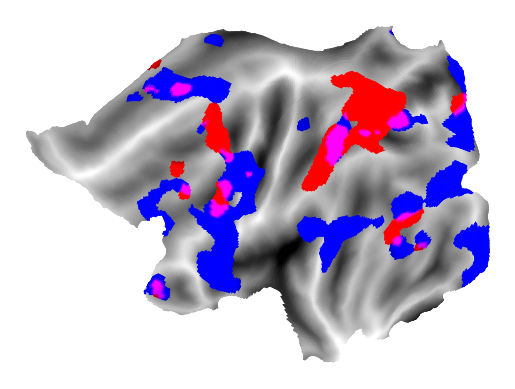

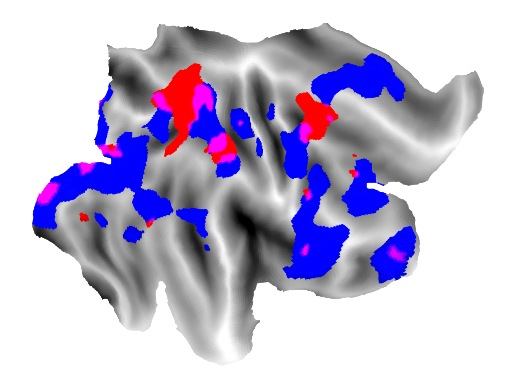

In [8]:
# get the contrast for load during encoding
data_loadEnc = c_loadFenc @ data_cortex
# do voxelwise one sample t-test 
t_loadEnc, p_loadEnc = stats.ttest_1samp(data_loadEnc, 
                                          axis = 0, 
                                          popmean = 0, 
                                          nan_policy = 'omit', 
                                          alternative = 'greater')

# apply fdr (creates a mask for ps surviving correction)
loadEnc_mask, _ = multitest.fdrcorrection(p_loadEnc, 
                                            alpha=0.05, 
                                            method='indep', 
                                            is_sorted=False)
mean_loadEnc = np.nanmean(data_loadEnc, axis = 0)
# apply the mask and plot on the flatmap
loadEnc_sig = mean_loadEnc * loadEnc_mask

# get the contrast for load during encoding
data_dirEnc = c_dirEnc @ data_cortex
# do voxelwise one sample t-test 
t_dirEnc, p_dirEnc = stats.ttest_1samp(data_dirEnc, 
                                          axis = 0, 
                                          popmean = 0, 
                                          nan_policy = 'omit', 
                                          alternative = 'greater')

# apply fdr (creates a mask for ps surviving correction)
dirEnc_mask, _ = multitest.fdrcorrection(p_dirEnc, 
                                            alpha=0.05, 
                                            method='indep', 
                                            is_sorted=False)

mean_dirEnc = np.nanmean(data_dirEnc, axis = 0)
# apply the mask and plot on the flatmap
dirEnc_sig = mean_dirEnc * dirEnc_mask

# make an rgb with the two contrasts masked
# prepare for rgb map
dat_rgb1 =np.c_[dirEnc_sig.reshape(-1, 1),
            np.zeros(dirEnc_sig.reshape(-1, 1).shape),
            loadEnc_sig.reshape(-1, 1)].T # Leave the green gun empty 
# plot on flatmap
ax1 = plotting.plot_rgb_map(dat_rgb1, 
                            atlas_space = "fs32k", 
                            scale = [0.03, 1, 0.05], 
                            threshold = [0.02, 1, 0.04])

## during retrieval, what are the regions that show both recall dir and load effect

### in the cerebellum

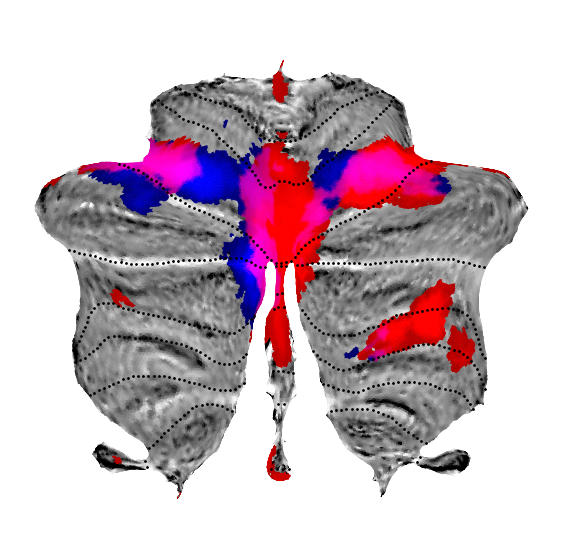

In [9]:
# get the contrast for load during encoding
data_loadRet = c_loadFret @ data_cereb
# do voxelwise one sample t-test 
t_loadRet, p_loadRet = stats.ttest_1samp(data_loadRet, 
                                          axis = 0, 
                                          popmean = 0, 
                                          nan_policy = 'omit', 
                                          alternative = 'greater')

# apply fdr (creates a mask for ps surviving correction)
loadRet_mask, _ = multitest.fdrcorrection(p_loadRet, 
                                            alpha=0.05, 
                                            method='indep', 
                                            is_sorted=False)
mean_loadRet = np.nanmean(data_loadRet, axis = 0)
# apply the mask and plot on the flatmap
loadRet_sig = mean_loadRet * loadRet_mask

# get the contrast for load during encoding
data_dirRet = c_dirRet @ data_cereb
# do voxelwise one sample t-test 
t_dirRet, p_dirRet = stats.ttest_1samp(data_dirRet, 
                                          axis = 0, 
                                          popmean = 0, 
                                          nan_policy = 'omit', 
                                          alternative = 'greater')

# apply fdr (creates a mask for ps surviving correction)
dirRet_mask, _ = multitest.fdrcorrection(p_dirRet, 
                                            alpha=0.05, 
                                            method='indep', 
                                            is_sorted=False)

mean_dirRet = np.nanmean(data_dirRet, axis = 0)
# apply the mask and plot on the flatmap
dirRet_sig = mean_dirRet* dirRet_mask

# make an rgb with the two contrasts masked
# prepare for rgb map
dat_rgb2 =np.c_[dirRet_sig.reshape(-1, 1),
            np.zeros(dirRet_sig.reshape(-1, 1).shape),
            loadRet_sig.reshape(-1, 1)].T # Leave the green gun empty 
# plot on flatmap
ax1 = plotting.plot_rgb_map(dat_rgb2, 
                            atlas_space = "SUIT3", 
                            scale = [0.03, 1, 0.05], 
                            threshold = [0.02, 1, 0.02])

### in the cortex

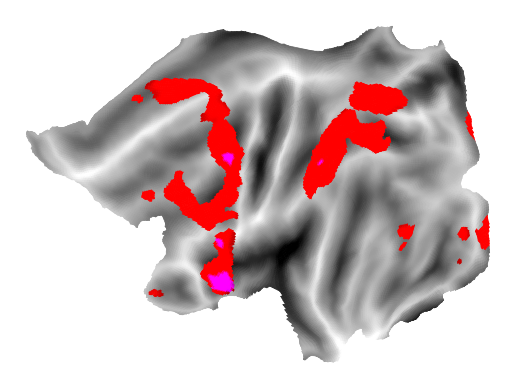

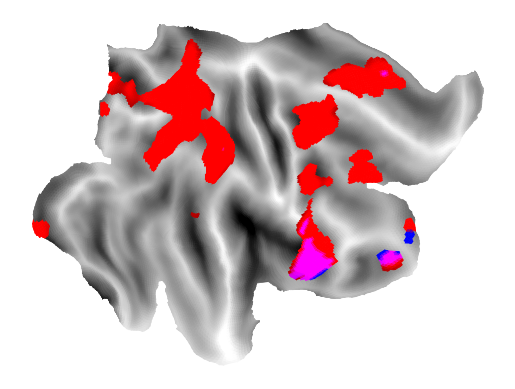

In [10]:
# get the contrast for load during encoding
data_loadRet = c_loadFret @ data_cortex
# do voxelwise one sample t-test 
t_loadRet, p_loadRet = stats.ttest_1samp(data_loadRet, 
                                          axis = 0, 
                                          popmean = 0, 
                                          nan_policy = 'omit', 
                                          alternative = 'greater')

# apply fdr (creates a mask for ps surviving correction)
loadRet_mask, _ = multitest.fdrcorrection(p_loadRet, 
                                            alpha=0.05, 
                                            method='indep', 
                                            is_sorted=False)
mean_loadRet = np.nanmean(data_loadRet, axis = 0)
# apply the mask and plot on the flatmap
loadRet_sig = mean_loadRet * loadRet_mask

# get the contrast for load during encoding
data_dirRet = c_dirRet @ data_cortex
# do voxelwise one sample t-test 
t_dirRet, p_dirRet = stats.ttest_1samp(data_dirRet, 
                                          axis = 0, 
                                          popmean = 0, 
                                          nan_policy = 'omit', 
                                          alternative = 'greater')

# apply fdr (creates a mask for ps surviving correction)
dirRet_mask, _ = multitest.fdrcorrection(p_dirRet, 
                                            alpha=0.05, 
                                            method='indep', 
                                            is_sorted=False)

mean_dirRet = np.nanmean(data_dirRet, axis = 0)
# apply the mask and plot on the flatmap
dirRet_sig = mean_dirRet* dirRet_mask

# make an rgb with the two contrasts masked
# prepare for rgb map
dat_rgb2 =np.c_[dirRet_sig.reshape(-1, 1),
            np.zeros(dirRet_sig.reshape(-1, 1).shape),
            loadRet_sig.reshape(-1, 1)].T # Leave the green gun empty 
# plot on flatmap
ax1 = plotting.plot_rgb_map(dat_rgb2, 
                            atlas_space = "fs32k", 
                            scale = [0.03, 1, 0.05], 
                            threshold = [0.02, 1, 0.02])